In [18]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.utils import resample
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# import dataframe
df = pd.read_csv("people_data_complete.csv")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Emp. ID                     4008 non-null   int64
 1   Department                  4008 non-null   int64
 2   Position                    4008 non-null   int64
 3   Gender                      4008 non-null   int64
 4   Sexual Orientation          4008 non-null   int64
 5   Race                        4008 non-null   int64
 6   Age                         4008 non-null   int64
 7   Education                   4008 non-null   int64
 8   Working Location            4008 non-null   int64
 9   City                        4008 non-null   int64
 10  Marital Status              4008 non-null   int64
 11  Emp. Type                   4008 non-null   int64
 12  Salary                      4008 non-null   int64
 13  Years of Service            4008 non-null   int64
 14  Status  

In [20]:
# Pull the total number of active employee vs inactive
counts = df['Status'].value_counts()

# print the counts
print(counts)

0    3409
1     599
Name: Status, dtype: int64


In [21]:
# The percentages of each

df['Status'].value_counts(normalize = True)

0    0.850549
1    0.149451
Name: Status, dtype: float64

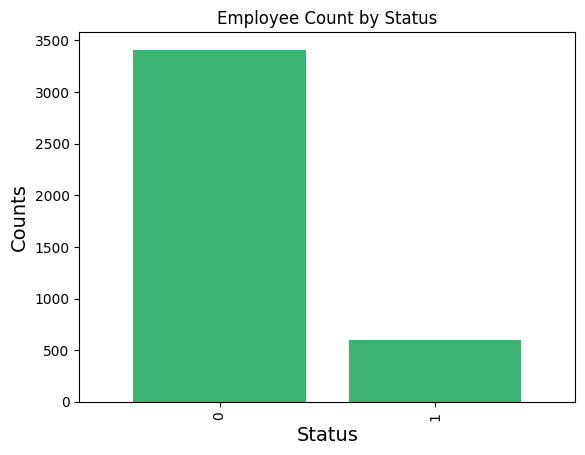

In [22]:
counts_status = df['Status'].value_counts()

# create a bar plot of the counts
counts_status.plot(kind='bar', color='mediumseagreen', width= .8, tick_label=['Current Employees (0)', 'Employees who have left (1)'])

# add x-axis and y-axis labels
plt.xlabel('Status', fontsize=14)
plt.ylabel('Counts', fontsize=14)

# add a title to the plot
plt.title('Employee Count by Status')

plt.savefig('status.jpg', dpi=300, bbox_inches='tight', transparent='true')
# show the plot
plt.show()


In [23]:
# Get the average of certain columns grouped by active vs inactive

df.groupby("Status")[["Job Satisfaction", "Work Life Balance",
                     "Years Since Last Promotion", "Performance Rating"]].mean()

,Job Satisfaction,Work Life Balance,Years Since Last Promotion,Performance Rating
Status,,,,
0,2.266940,1.975946,1.759460,2.737460
1,2.307179,1.948247,1.050083,2.746244


/var/folders/ws/jkj_lr2s6cq9yrm51_7rlvwxl66_5_/T/ipykernel_88646/897915019.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,3, i+1) # 3 charts in a row w/ 5 columns


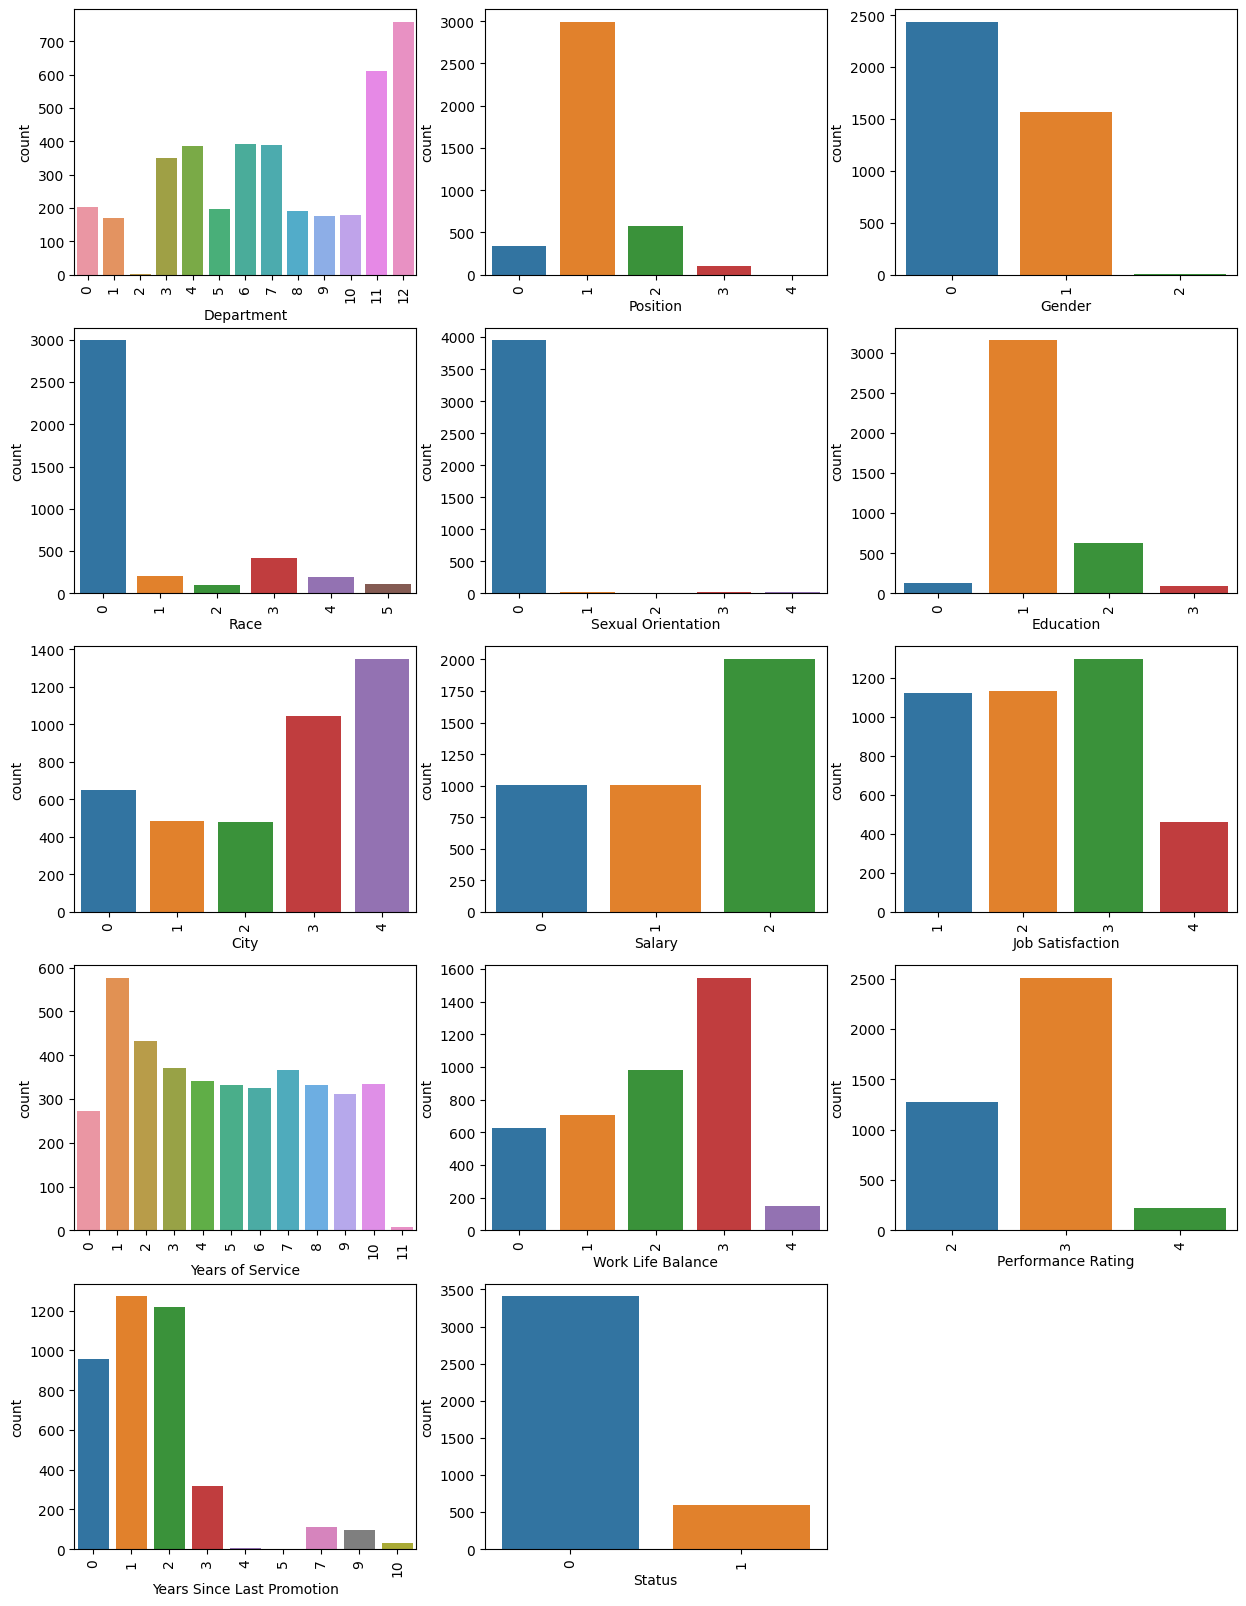

In [24]:
# Plot some of the columns

features_1 =['Department','Position','Gender','Race','Sexual Orientation', 'Education', 'City', 'Salary', 'Job Satisfaction',
         'Years of Service', 'Work Life Balance', 'Performance Rating', 'Years Since Last Promotion', 'Status']
fig=plt.subplots(figsize=(15, 20))
for i, j in enumerate(features_1): # this will chart the features 1 by 1
    plt.subplot(5,3, i+1) # 3 charts in a row w/ 5 columns
    sns.countplot(x=j, data=df)
    plt.xticks(rotation=90)

/var/folders/ws/jkj_lr2s6cq9yrm51_7rlvwxl66_5_/T/ipykernel_88646/3962094406.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6,4, i+1)


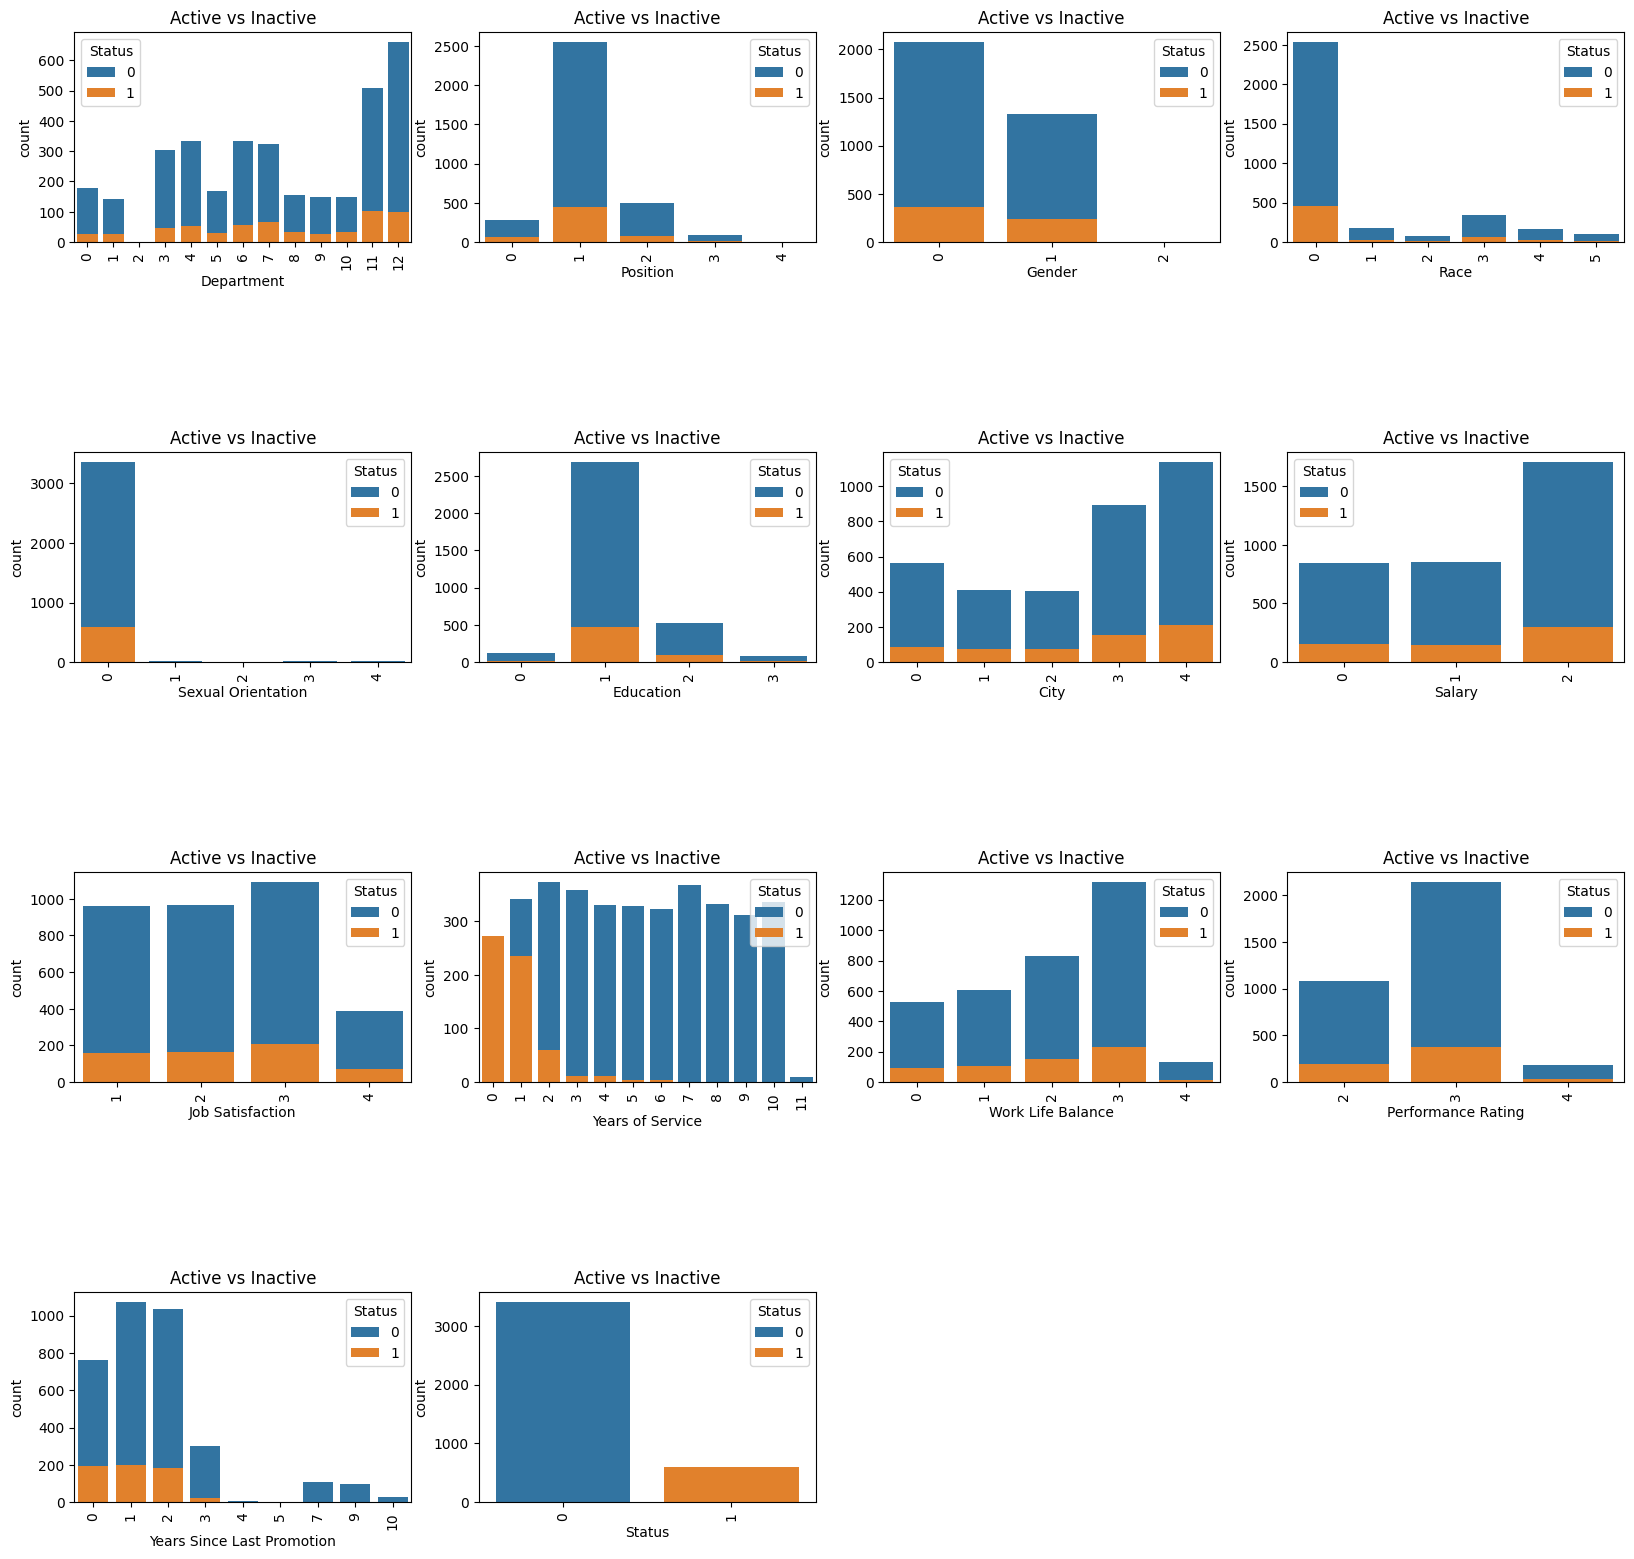

In [25]:
fig=plt.subplots(figsize=(20,30))
for i, j in enumerate(features_1):
    plt.subplot(6,4, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=df, hue='Status', dodge=False)
    plt.xticks(rotation=90)
    plt.title("Active vs Inactive")

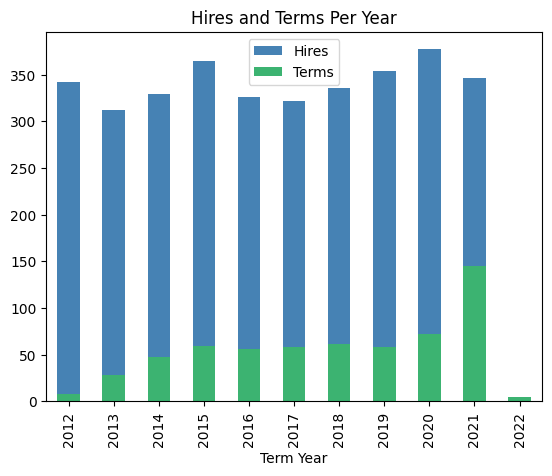

In [28]:
# create a hires dataframe grouped by hire year
hires = df[df['Status'] == 0].groupby('Hire Year').count()['Status']

# create a terms dataframe grouped by term year
terms = df[df['Status'] == 1].groupby('Term Year').count()['Status']

# plot the hires and terms dataframes
fig, ax = plt.subplots()
hires.plot(kind='bar', color='steelblue', ax=ax)
terms.plot(kind='bar', color='mediumseagreen', ax=ax)
plt.title('Hires and Terms Per Year')
plt.legend(['Hires', 'Terms'])

plt.savefig('hires_terms.jpg', dpi=300, bbox_inches='tight', transparent='true')

plt.show()

In [29]:
df.drop(['Emp. ID', 'Hire Year', 'Term Year'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Department                  4008 non-null   int64
 1   Position                    4008 non-null   int64
 2   Gender                      4008 non-null   int64
 3   Sexual Orientation          4008 non-null   int64
 4   Race                        4008 non-null   int64
 5   Age                         4008 non-null   int64
 6   Education                   4008 non-null   int64
 7   Working Location            4008 non-null   int64
 8   City                        4008 non-null   int64
 9   Marital Status              4008 non-null   int64
 10  Emp. Type                   4008 non-null   int64
 11  Salary                      4008 non-null   int64
 12  Years of Service            4008 non-null   int64
 13  Status                      4008 non-null   int64
 14  Job Sati

# Prepare Data for Model

## Split Train and Test Set
#### Balance Data
#### Select Best Features

In [30]:
features = ['Department', 'Position', 'Gender', 'Sexual Orientation', 'Race', 'Age', 'Education', 'Working Location', 'City', 
            'Marital Status', 'Emp. Type', 'Salary', 'Years of Service', 
            'Job Satisfaction', 'Work Life Balance', 'Years Since Last Promotion', 'Performance Rating']

target = ['Status']

# assign the features and target to X and y
X = df[features]
y = df[target]

# print the shapes of X and y
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (4008, 17)
y shape: (4008, 1)


In [31]:
# split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shapes of the training and testing sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (3206, 17)
y_train shape: (3206, 1)
X_test shape: (802, 17)
y_test shape: (802, 1)


## Upsample

In [32]:
# Separate majority and minority classes
df_majority = df[df.Status==0]
df_minority = df[df.Status==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Use the upsampled data for training
X_train_upsampled = df_upsampled.drop('Status', axis=1)
y_train_upsampled = df_upsampled['Status']

In [33]:
counts = df_upsampled['Status'].value_counts()
print(counts)

0    3409
1    3409
Name: Status, dtype: int64


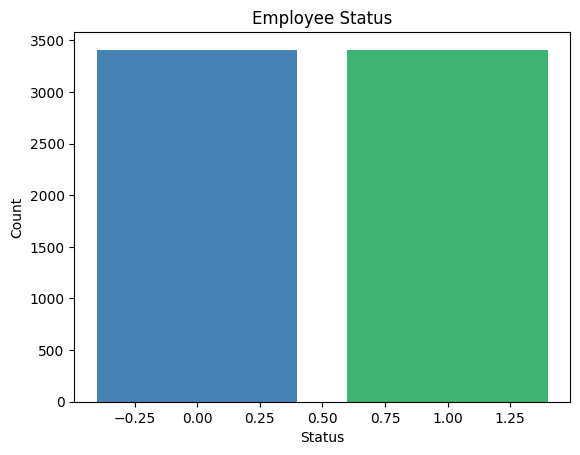

In [35]:
import matplotlib.pyplot as plt

counts = df_upsampled['Status'].value_counts()

plt.bar(counts.index, counts.values, color=['steelblue', 'mediumseagreen'])
plt.title('Employee Status')
plt.xlabel('Status')
plt.ylabel('Count')

plt.savefig('status_up.jpg', dpi=300, bbox_inches='tight', transparent='true')
plt.show()

## Select the Best Features

In [36]:
# Separate the target variable from the feature matrix
X = df_upsampled.drop('Status', axis=1)
y = df_upsampled['Status']

# Apply feature selection using Fisher's score
fs = SelectKBest(score_func=f_classif, k=10)
X_fs = fs.fit_transform(X, y)

# Get the K features with the highest Fisher's score
top_k_features = pd.DataFrame({'feature': X.columns[fs.get_support()].tolist(), 'score': fs.scores_[fs.get_support()]})
top_k_features = top_k_features.nlargest(10, 'score')
print(top_k_features)

                      feature        score
6            Years of Service  7971.085508
8  Years Since Last Promotion   367.469696
5                   Emp. Type    18.999210
2                        Race     3.165944
9          Performance Rating     3.129838
0                    Position     2.808305
1          Sexual Orientation     1.867790
7            Job Satisfaction     1.575744
4                        City     1.338034
3                   Education     1.305626


In [37]:
# Create a list of the top features
top_features = ['Years of Service', 'Years Since Last Promotion', 'Emp. Type', 
                'Race', 'Performance Rating', 'Position', 'Sexual Orientation', 
                'Job Satisfaction', 'City', 'Education', 'Status']


# Create a new dataframe with only the top features from the upsampled dataframe
df_top_features = df_upsampled[top_features]

In [38]:
df_up = df_top_features = df_upsampled[top_features]

In [39]:
df_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 0 to 479
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Years of Service            6818 non-null   int64
 1   Years Since Last Promotion  6818 non-null   int64
 2   Emp. Type                   6818 non-null   int64
 3   Race                        6818 non-null   int64
 4   Performance Rating          6818 non-null   int64
 5   Position                    6818 non-null   int64
 6   Sexual Orientation          6818 non-null   int64
 7   Job Satisfaction            6818 non-null   int64
 8   City                        6818 non-null   int64
 9   Education                   6818 non-null   int64
 10  Status                      6818 non-null   int64
dtypes: int64(11)
memory usage: 639.2 KB


/var/folders/ws/jkj_lr2s6cq9yrm51_7rlvwxl66_5_/T/ipykernel_88646/3899625745.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,3, i+1) # 3 charts in a row w/ 5 columns


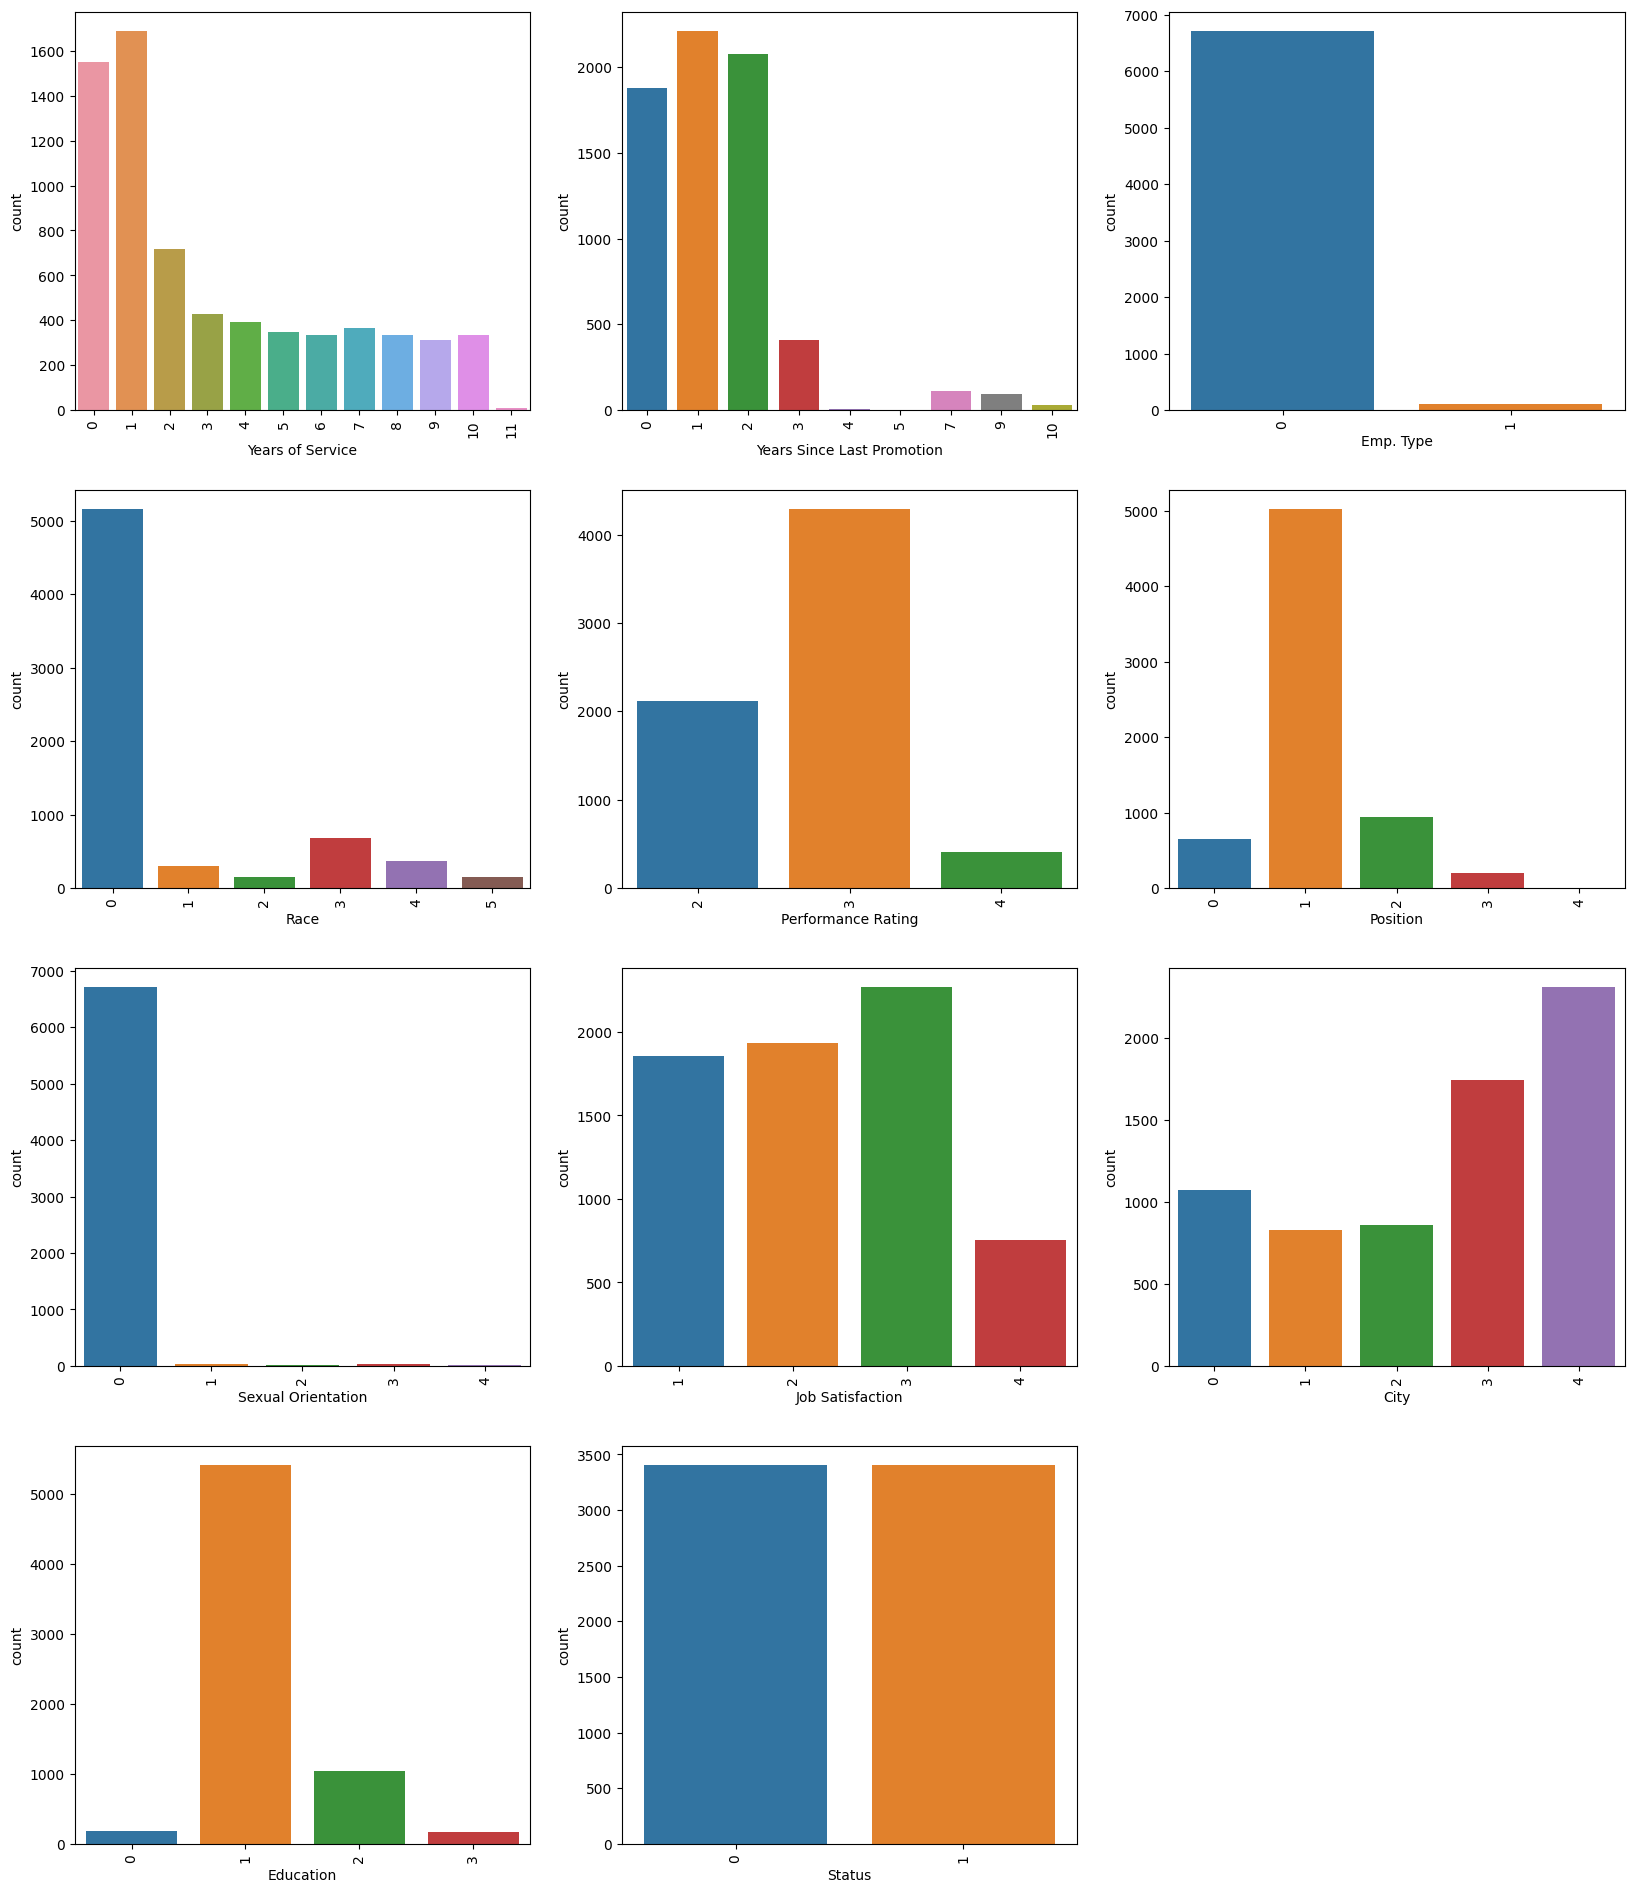

In [40]:
features_2 = ['Years of Service', 'Years Since Last Promotion', 'Emp. Type', 
                'Race', 'Performance Rating', 'Position', 'Sexual Orientation', 
                'Job Satisfaction', 'City', 'Education', 'Status']
fig=plt.subplots(figsize=(20, 30))
for i, j in enumerate(features_2): # this will chart the features 1 by 1
    plt.subplot(5,3, i+1) # 3 charts in a row w/ 5 columns
    sns.countplot(x=j, data=df_up)
    plt.xticks(rotation=90)

/var/folders/ws/jkj_lr2s6cq9yrm51_7rlvwxl66_5_/T/ipykernel_88646/2602796199.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,3, i+1)


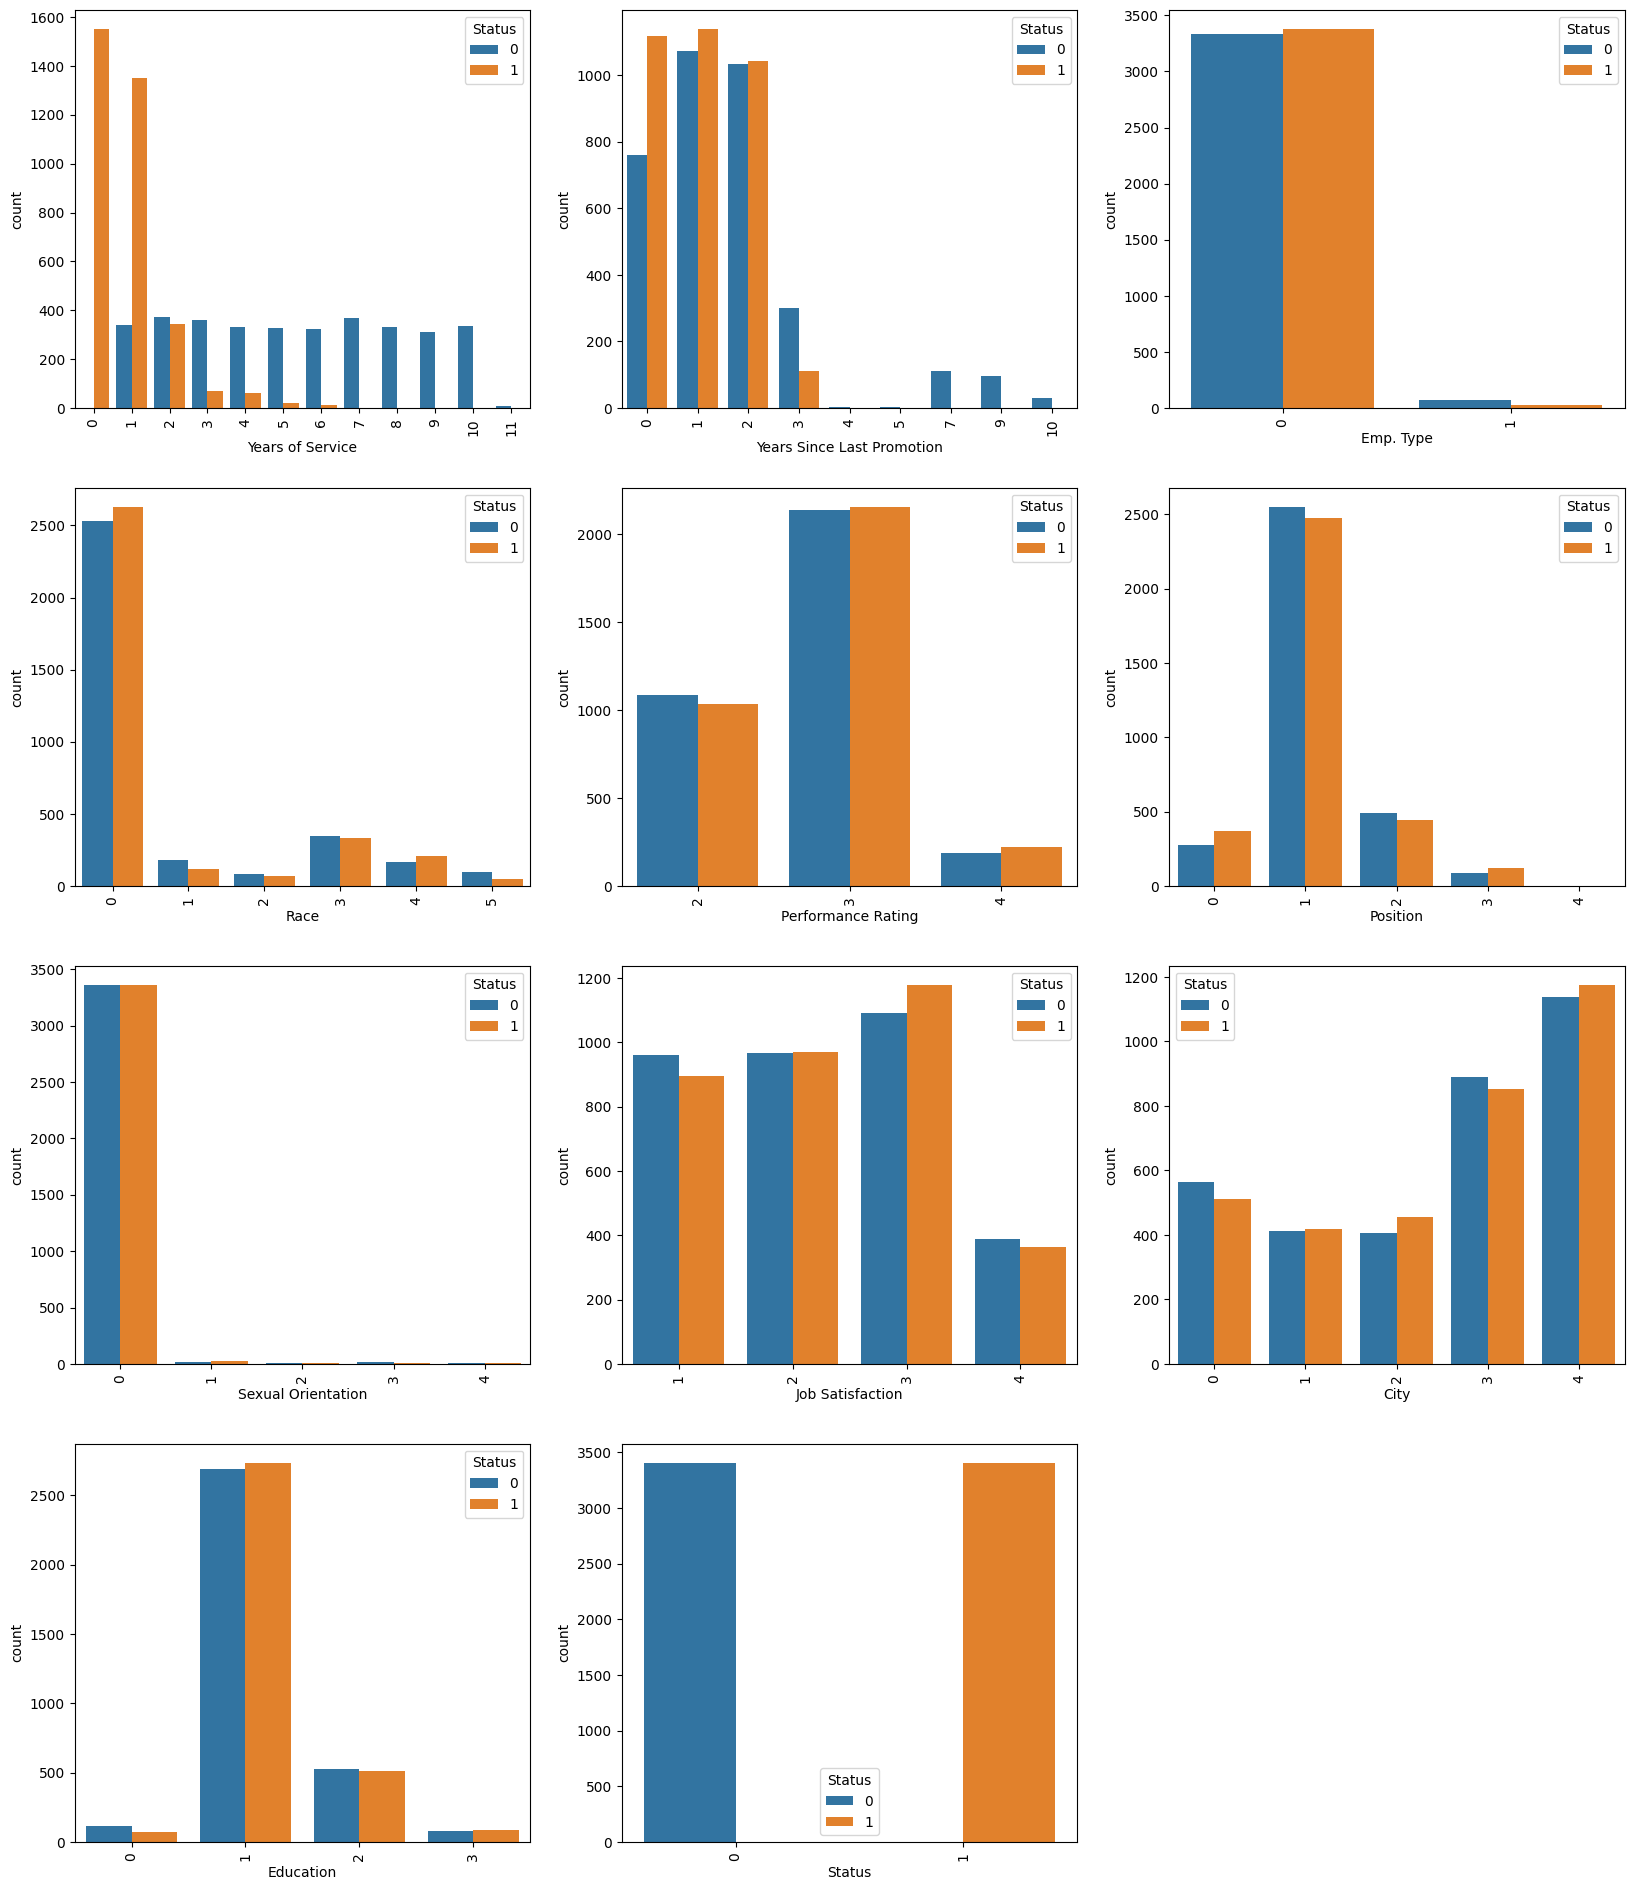

In [41]:
features_2 = ['Years of Service', 'Years Since Last Promotion', 'Emp. Type', 
                'Race', 'Performance Rating', 'Position', 'Sexual Orientation', 
                'Job Satisfaction', 'City', 'Education', 'Status']
fig=plt.subplots(figsize=(20, 30))

for i, j in enumerate(features_2):
    plt.subplot(5,3, i+1)
    sns.countplot(x=j,data=df_up, hue= 'Status')
    plt.xticks(rotation=90)

## Create test, train split with new dataset

In [42]:
from sklearn.model_selection import train_test_split

# Splitting into features and target variable
X = df_up.drop('Status', axis=1)
y = df_up['Status']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the data to ensure consistency
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5454, 10)
X_test shape: (1364, 10)
y_train shape: (5454,)
y_test shape: (1364,)


# Model Building

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

## Logistic Regression

In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred_lr = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.8790322580645161


In [47]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       706
           1       0.83      0.95      0.88       658

    accuracy                           0.88      1364
   macro avg       0.89      0.88      0.88      1364
weighted avg       0.89      0.88      0.88      1364



In [48]:
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix_lr)

[[576 130]
 [ 35 623]]


In [49]:
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("AUC Score: {:.2f}".format(logreg_auc_score))

AUC Score: 0.95


## Decision Tree

In [50]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dtc = dtc.predict(X_test)

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))

Accuracy: 0.9398826979472141


In [52]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       706
           1       0.89      1.00      0.94       658

    accuracy                           0.94      1364
   macro avg       0.94      0.94      0.94      1364
weighted avg       0.95      0.94      0.94      1364



In [53]:
confusion_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
print(confusion_matrix_dtc)

[[627  79]
 [  3 655]]


In [54]:
dtc_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("AUC Score: {:.2f}".format(dtc_auc_score))

AUC Score: 0.95


## Random Forest Classifer

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
y_pred_rf = rf.predict(X_test)

In [57]:
rf_acc_score = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", rf_acc_score)

Accuracy: 0.9494134897360704


In [58]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       706
           1       0.91      1.00      0.95       658

    accuracy                           0.95      1364
   macro avg       0.95      0.95      0.95      1364
weighted avg       0.95      0.95      0.95      1364



In [59]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

[[638  68]
 [  1 657]]


In [60]:
rf_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("AUC Score: {:.2f}".format(rf_auc_score))

AUC Score: 0.95


## Gaussian Naive Bayes

In [61]:
gb = GaussianNB()
gb.fit(X_train, y_train)

GaussianNB()

In [62]:
y_pred_gb = gb.predict(X_test)

In [63]:
gb_acc_score = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", gb_acc_score)

Accuracy: 0.8548387096774194


In [64]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       706
           1       0.79      0.95      0.86       658

    accuracy                           0.85      1364
   macro avg       0.87      0.86      0.85      1364
weighted avg       0.87      0.85      0.85      1364



In [65]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(conf_matrix_gb)

[[542 164]
 [ 34 624]]


In [66]:
gb_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print("AUC Score: {:.2f}".format(gb_auc_score))

AUC Score: 0.95


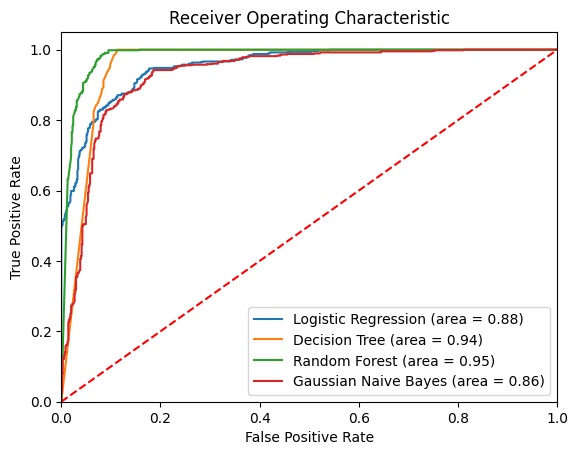

In [67]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])


# Fit and predict with decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])

# Fit and predict with random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

# Fit and predict with Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_roc_auc = roc_auc_score(y_test, gnb.predict(X_test))
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])

# Plot the ROC curve for all classifiers
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(gnb_fpr, gnb_tpr, label='Gaussian Naive Bayes (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

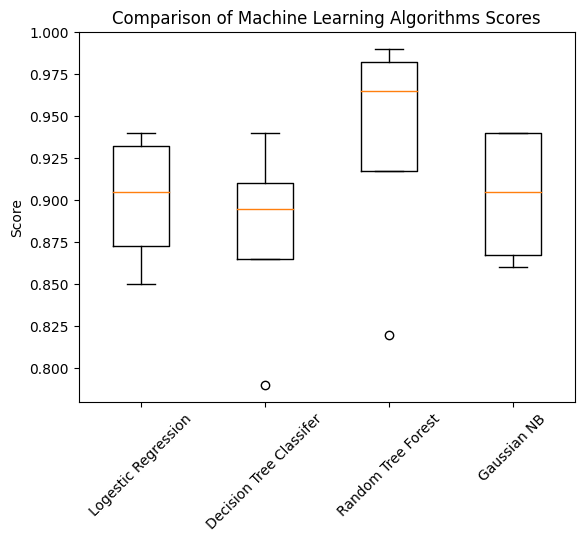

In [1]:
import matplotlib.pyplot as plt

# Data for the whisker plot
algorithms = ['Logestic Regression', 'Decision Tree Classifer', 'Random Tree Forest', 'Gaussian NB']
accuracy = [0.88, 0.94, 0.9, 0.85]
precision = [0.94, 0.89, 0.90, 0.79]
recall = [0.82, 0.98, 0.99, 0.95]
f1_score = [0.87, 0.94, 0.94, 0.86]

# Combine the data into a list
data = [accuracy, precision, recall, f1_score]

# Create the boxplot
plt.boxplot(data)

# Add labels and title
plt.xticks(range(1, len(algorithms) + 1), algorithms, rotation=45)
plt.ylabel('Score')
plt.title('Comparison of Machine Learning Algorithms Scores')

plt.savefig('compare_ML.jpg', dpi=300, bbox_inches='tight', transparent='true')

# Display the plot
plt.show()

In [69]:
# Save the model
import joblib
joblib.dump(rf, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [70]:
import pandas as pd
import numpy as np

In [71]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Load the current employees dataset into a dataframe
df = pd.read_csv('people_data_complete.csv')

In [100]:
predict_df = df[['Years of Service', 'Years Since Last Promotion', 'Emp. Type', 
                'Race', 'Performance Rating', 'Position', 'Sexual Orientation', 
                'Job Satisfaction', 'City', 'Education']]

In [101]:
rf = joblib.load('random_forest_model.pkl')

In [102]:
predict_df_copy = predict_df.copy()
probs = rf.predict_proba(predict_df_copy)[:, 1] # generates predicted probabilities for the positive class (turnover)
predict_df_copy['turnover_probability'] = probs

In [103]:
Statisfaction_analysis = predict_df_copy.groupby('Job Satisfaction')['turnover_probability'].mean()
print(Statisfaction_analysis)

Job Satisfaction
1    0.201317
2    0.201505
3    0.214281
4    0.196051
Name: turnover_probability, dtype: float64


In [80]:
Emp_Type_analysis = predict_df_copy.groupby('Emp. Type')['turnover_probability'].mean()
print(Emp_Type_analysis)

Emp. Type
0    0.206996
1    0.099752
Name: turnover_probability, dtype: float64


In [81]:
City_analysis = predict_df_copy.groupby('City')['turnover_probability'].mean()
print(City_analysis)

City
0    0.179748
1    0.203000
2    0.201410
3    0.207768
4    0.216947
Name: turnover_probability, dtype: float64


In [82]:
Years_analysis = predict_df_copy.groupby('Years of Service')['turnover_probability'].mean()
print(Years_analysis)

Years of Service
0     0.997676
1     0.626613
2     0.275508
3     0.065999
4     0.076538
5     0.026555
6     0.019570
7     0.001196
8     0.002659
9     0.001447
10    0.002055
11    0.002222
Name: turnover_probability, dtype: float64


In [85]:
Promotion_analysis = predict_df_copy.groupby('Years Since Last Promotion')['turnover_probability'].mean()
print(Promotion_analysis)

Years Since Last Promotion
0     0.277915
1     0.209817
2     0.208835
3     0.107144
4     0.011562
5     0.000000
7     0.001535
9     0.000313
10    0.000667
Name: turnover_probability, dtype: float64


In [86]:
race_analysis = predict_df_copy.groupby('Race')['turnover_probability'].mean()
print(race_analysis)

Race
0    0.211576
1    0.164792
2    0.183467
3    0.202540
4    0.215731
5    0.104502
Name: turnover_probability, dtype: float64


In [87]:
perform_analysis = predict_df_copy.groupby('Performance Rating')['turnover_probability'].mean()
print(perform_analysis)

Performance Rating
2    0.206258
3    0.202997
4    0.219477
Name: turnover_probability, dtype: float64


In [88]:
position_analysis = predict_df_copy.groupby('Position')['turnover_probability'].mean()
print(position_analysis)

Position
0    0.231340
1    0.204877
2    0.186098
3    0.227046
4    0.010000
Name: turnover_probability, dtype: float64


In [89]:
orientation_analysis = predict_df_copy.groupby('Sexual Orientation')['turnover_probability'].mean()
print(orientation_analysis)

Sexual Orientation
0    0.205596
1    0.253394
2    0.140869
3    0.104211
4    0.136733
Name: turnover_probability, dtype: float64


In [91]:
education_analysis = predict_df_copy.groupby('Education')['turnover_probability'].mean()
print(education_analysis)


Education
0    0.149450
1    0.205685
2    0.210022
3    0.225173
Name: turnover_probability, dtype: float64
